In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("C:/Users/Administrator/Desktop/data/Data.xlsx")
df_price = pd.read_excel("C:/Users/Administrator/Desktop/data/price.xlsx", index_col = 0)

stock_rule = 50
portfolio_number = 5
initial_portfolio_value = 100

In [2]:
df.head(5)

,date,股票代码,总市值,ptv
0,20120309,000001.SZ,8643092.0,0.000092
1,20120312,000001.SZ,8555995.0,0.000091
2,20120313,000001.SZ,8632845.0,0.000092
3,20120314,000001.SZ,8443281.0,0.000090
4,20120315,000001.SZ,8325444.5,0.000089


In [3]:
df_new = df.sort_values(by=["date", "ptv"],ascending = [True, True])
index = np.unique(df_new["date"], return_index = True)
num = index[1]


days = []
days_index = []
stock_numbers = []
for i in range(0, len(num) - 1):
    if (num[i+1] - num[i]) > stock_rule:
        days.append(index[0][i])
        days_index.append(num[i])
        stock_numbers.append(num[i+1] - num[i])
days

[20120301,
 20120302,
 20120305,
 20120306,
 20120307,
 20120308,
 20120309,
 20120312,
 20120313,
 20120314,
 20120315,
 20120316,
 20120319,
 20120320,
 20120321,
 20120322,
 20120323,
 20120326,
 20120327,
 20120328,
 20120329,
 20120330,
 20120405,
 20120406,
 20120409,
 20120410,
 20120411,
 20120412,
 20120413,
 20120416,
 20120417,
 20120418,
 20120419,
 20120420,
 20120423,
 20120424,
 20120425,
 20120426,
 20120427,
 20120502,
 20120503,
 20120504,
 20120507,
 20120508,
 20120509,
 20120510,
 20120511,
 20120514,
 20120515,
 20120516,
 20120517,
 20120518,
 20120521,
 20120522,
 20120523,
 20120524,
 20120525,
 20120528,
 20120529,
 20120530,
 20120531,
 20120601,
 20120604,
 20120605,
 20120606,
 20120607,
 20120608,
 20120611,
 20120612,
 20120613,
 20120614,
 20120615,
 20120618,
 20120619,
 20120620,
 20120621,
 20120625,
 20120626,
 20120627,
 20120628,
 20120629,
 20120702,
 20120703,
 20120704,
 20120705,
 20120706,
 20120709,
 20120710,
 20120711,
 20120712,
 20120713,

In [4]:
days_num = np.array(days)/100
days_id = [int(x) for x in days_num]
days_first = np.unique(days_id, return_index = True)
first_day = days_first[0]
first_day_index = days_first[1]
first_day_index

array([   0,   22,   39,   61,   81,  103,  126,  146,  164,  186,  207,
        227,  242,  263,  281,  303,  320,  343,  365,  384,  402,  423,
        445,  466,  482,  503,  524,  544,  564,  587,  608,  629,  647,
        667,  690,  710,  725,  747,  768,  788,  809,  832,  853,  873,
        890,  911,  934,  954,  970,  993, 1013, 1034, 1054, 1075, 1098,
       1118, 1134, 1156, 1178, 1196, 1214, 1237, 1255, 1275, 1297, 1318,
       1341, 1362, 1379, 1401, 1422, 1444, 1459, 1481, 1499, 1521, 1541,
       1563, 1586, 1605, 1623, 1645, 1665, 1687, 1702, 1723, 1744, 1764,
       1783, 1806, 1828, 1848, 1866, 1887], dtype=int64)

In [5]:
weight = []
weight_name = []
for first_day_num in first_day_index:
    df_new_index = days_index[first_day_num]
    total = sum(df_new.iloc[df_new_index : df_new_index + portfolio_number, 2])
    temp = df_new.iloc[df_new_index : df_new_index + portfolio_number, 2] / total
    weight.append(list(temp))
    weight_name.append(list(df_new.iloc[df_new_index : df_new_index + portfolio_number, 1]))

In [6]:
df_first_days = [df_new.iloc[days_index[first_day_num], 0] for first_day_num in first_day_index]
df_first_days

[20120301,
 20120405,
 20120502,
 20120601,
 20120702,
 20120801,
 20120903,
 20121008,
 20121101,
 20121203,
 20130104,
 20130201,
 20130301,
 20130401,
 20130502,
 20130603,
 20130701,
 20130801,
 20130902,
 20131008,
 20131101,
 20131202,
 20140102,
 20140207,
 20140303,
 20140401,
 20140505,
 20140603,
 20140701,
 20140801,
 20140901,
 20141008,
 20141103,
 20141201,
 20150105,
 20150202,
 20150302,
 20150401,
 20150504,
 20150601,
 20150701,
 20150803,
 20150901,
 20151008,
 20151102,
 20151201,
 20160104,
 20160201,
 20160301,
 20160401,
 20160503,
 20160601,
 20160701,
 20160801,
 20160901,
 20161010,
 20161101,
 20161201,
 20170103,
 20170203,
 20170301,
 20170405,
 20170502,
 20170601,
 20170703,
 20170801,
 20170901,
 20171009,
 20171101,
 20171201,
 20180102,
 20180201,
 20180301,
 20180402,
 20180502,
 20180601,
 20180702,
 20180801,
 20180903,
 20181008,
 20181101,
 20181203,
 20190102,
 20190201,
 20190301,
 20190401,
 20190506,
 20190603,
 20190701,
 20190801,
 20190902,

In [17]:
portfolio_value = []
portfolio_return = []

portfolio_value_temp = initial_portfolio_value

for i in range(1, len(df_first_days)):
    price = df_price.loc[df_first_days[i],weight_name[i-1]]
    price_previous = df_price.loc[df_first_days[i-1],weight_name[i-1]]
    holding_period_yield = 0
    for j in range(portfolio_number):
        # Deal with the None Value because of delisting. We assume this stock can be sold at the price of previous rebalance time.
        if np.isnan(price[j]):
            price[j] = price_previous[j]
        holding_period_yield = holding_period_yield + (price[j] / price_previous[j] - 1) * weight[i-1][j]
        
    portfolio_return.append(holding_period_yield)
    portfolio_value_temp = portfolio_value_temp * (1+holding_period_yield)
    portfolio_value.append(portfolio_value_temp)    
portfolio_value

[92.82896191018972,
 95.15965406142695,
 92.77829879663878,
 96.26777161763552,
 84.68449651852217,
 83.47659028806571,
 84.34822700400576,
 87.60214839276117,
 78.81418033519694,
 86.44263745639391,
 92.42378958386284,
 96.80671563375398,
 100.51806134621863,
 103.61093817960212,
 105.61867672615293,
 88.4131736782715,
 89.47597528158178,
 93.29696281589298,
 92.5637914205968,
 91.36553414212747,
 92.9096923593621,
 94.548250248561,
 90.00486187641354,
 88.54530221810181,
 102.78852771479973,
 99.00171980258247,
 98.69552828457705,
 104.23752734523191,
 115.18917836169032,
 121.49492261140396,
 140.39633439613206,
 156.45539831497965,
 171.417395744957,
 195.27353836816465,
 184.84844389613738,
 207.86531547787206,
 245.6335418728172,
 298.5152240233126,
 348.9024361576238,
 279.7952242498761,
 216.53082443574874,
 187.46268552197088,
 196.48062336413932,
 235.42078209409866,
 249.47337624137236,
 244.69010320837384,
 187.56673340333913,
 204.51833936228226,
 227.0290808372385,
 244.1

In [19]:
len(df_first_days)

94

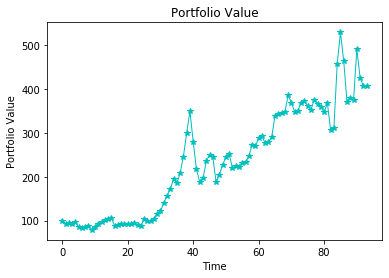

In [20]:
import matplotlib.pyplot as plt

x = range(0, len(df_first_days))
y1 = portfolio_value
y2 = portfolio_return
y1.insert(0, 100)
y2.insert(0, 0)
plt.plot(x, y1, 'c*-',linewidth=1)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title("Portfolio Value")
plt.show()

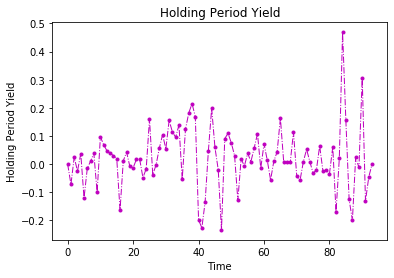

In [21]:
plt.plot(x, y2, 'm.-.',linewidth=1)
plt.xlabel('Time')
plt.ylabel('Holding Period Yield')
plt.title("Holding Period Yield")
plt.show()

In [23]:
dict_out = {"Date": df_first_days, "Portfolio Value": y1, "Holding Period Yield": y2}
df_out = pd.DataFrame(dict_out)
df_out.to_excel("Portfolio.xlsx", sheet_name="Sheet1", index=False, header=True)
print("Done!")

Done!
